In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings 
warnings.filterwarnings('ignore')

In [15]:
#dataframe
df = pd.read_csv("D:/AT82.03_ML/A1_Predicting_Car_Price/a2-predicting-car-prices-PK-124960/.streamlit/Cars.csv") 

# Create a mapping from original categories to new integer values
label_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}

# Apply the new mapping to the 'owner' column
df['owner'] = df['owner'].map(label_mapping)

# To check the all columns in the feature 'owner'
df.owner.value_counts()

1    5289
2    2105
3     555
4     174
5       5
Name: owner, dtype: int64

In [16]:
# To check the all columns in the feature 'fuel'
df.fuel.value_counts()
# Create a mask to identify rows with 'CNG' or 'LPG'
mask = (df['fuel'] != 'CNG') & (df['fuel'] != 'LPG')

# Filter the DataFrame using the mask
df = df[mask]

df.fuel.value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

In [17]:
# to split the data into the mileage column and choose only the first
df['mileage'] = df['mileage'].str.split().str[0]
df.mileage

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [18]:
# converting the column "df.mileage" as object type to numerical type as float
df['mileage'] = df['mileage'].astype(float)
df.mileage

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

In [19]:
# To check the all columns in the feature 'engine'
df.engine.value_counts()

1248 CC    1017
1197 CC     832
796 CC      432
998 CC      424
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [20]:
# to split the data into the engine column and choose only the first as object type
# converting the column "engine" to numerical type as float
df['engine'] = df['engine'].str.split().str[0]
df['engine'] = df['engine'].astype(float)
df.engine

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

In [21]:
df.max_power.value_counts()

74 bhp       377
81.80 bhp    220
88.5 bhp     204
67 bhp       165
46.3 bhp     162
            ... 
175 bhp        1
400 bhp        1
80.84 bhp      1
68.4 bhp       1
135.1 bhp      1
Name: max_power, Length: 309, dtype: int64

In [22]:
# Do tha same for Max power
# to split the data into the max_power column and choose only the first as object type
# converting the column "max_power" to numerical type as float
df['max_power'] = df['max_power'].str.split().str[0]
df['max_power'] = df['max_power'].astype(float)
df.engine

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

In [23]:
# split the column of name to take only the first word and remove the rest
df['name'] = df['name'].str.split().str[0]
df.name

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8033, dtype: object

In [24]:
# to remove the feature torque
df.drop('torque', axis=1, inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [25]:
df.owner.value_counts()
# 1 means 'First Owner',
# 2 means 'Second Owner',
# 3 means 'Third Owner',
# 4 means 'Fourth & Above Owner',
# 5 means 'Test Drive Car'

1    5238
2    2073
3     547
4     170
5       5
Name: owner, dtype: int64

In [26]:
# Create a mask to identify row 5 as 'Test Drive Car
mask = df['owner'] != 5

# Filter the DataFrame using the mask
df = df[mask]

df.owner.value_counts()

1    5238
2    2073
3     547
4     170
Name: owner, dtype: int64

In [27]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


<Axes: xlabel='x', ylabel='y'>

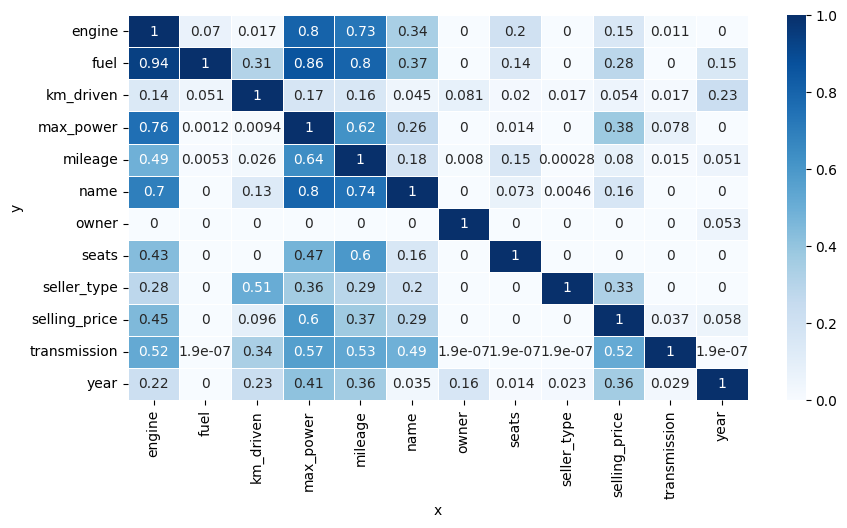

In [28]:
import ppscore as pps 
# to consider the feature relation as the dependent variable is "selling price"

# I use all features, no one removed
dfcopy = df.copy()
# call ppscore
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore') 
# Selects only the 'x', 'y', and 'ppscore' columns from the PPS matrix.

# plot
plt.figure(figsize=(10,5))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# from the ppscore shows the features which has a low relative are fuel, owner, seats, seller_type, km_driven, transmission and year
# so the features I will select  to create the model are engine, max_power, mileage, and name

In [29]:
# the feature name needs to create the label to be counted as
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["name"] = le.fit_transform(df["name"])
df["name"].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [30]:
le.inverse_transform([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [31]:
df['name'] = df['name'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   float64
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 815.3+ KB


In [32]:
# decide the feature : engine, max_power, mileage, and name
X = df[['engine','max_power', 'mileage', 'name']]
# decide the target
y = np.log(df['selling_price'])
#y = df['selling_price']

X.shape, y.shape

((8028, 4), (8028,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# x_train is 0.7 * all number of samples, here is 0.7 * 8028
# y_train is 0.7 * all number of samples, here is 0.7 * 8028
# x_test is 0.3 * all number of samples, here is 0.3 * 8028
# y_test is 0.3 * all number of samples, here is 0.3 * 8028
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6422, 4), (6422,), (1606, 4), (1606,))

In [34]:
X_train.isna().sum(), X_test.isna().sum()

(engine       171
 max_power    165
 mileage      171
 name           0
 dtype: int64,
 engine       43
 max_power    43
 mileage      43
 name          0
 dtype: int64)

(1462.9146403890454, 1248.0)

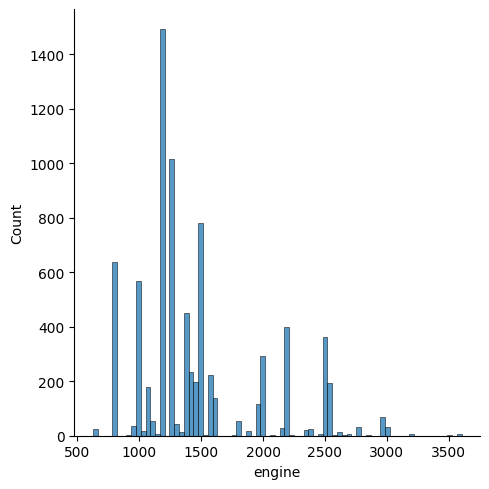

In [35]:
### step of thinking when filling missing values

#1.     look at the distribution
sns.displot(data=df, x='engine')
df['engine'].mean(), df['engine'].median() # fillind the missing values with median

(91.8197257033248, 82.4)

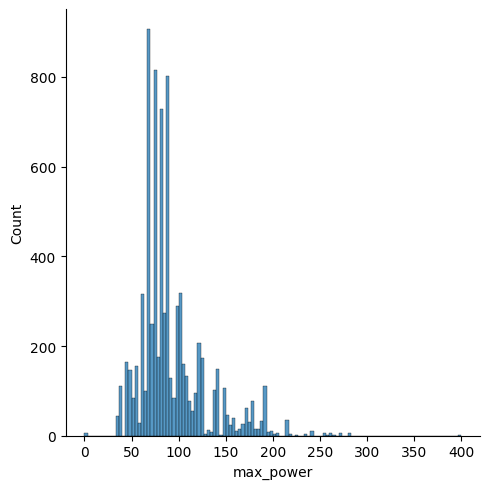

In [36]:
sns.displot(data=df, x='max_power')
df['max_power'].mean(), df['max_power'].median() # fillind the missing values with median

(19.391961863322244, 19.3)

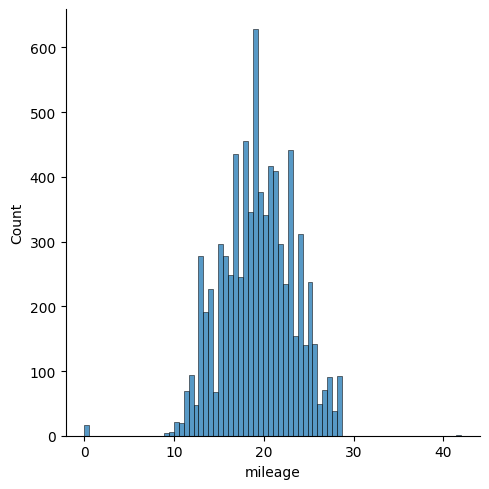

In [37]:
sns.displot(data=df, x='mileage')
df['mileage'].mean(), df['mileage'].median() # fillind the missing values with mean

In [38]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

# Also Fill max_power column where value equals to 0 with the median
zero_power_indices = X_train[X_train['max_power'] == 0].index
X_train.loc[zero_power_indices] = X_train['max_power'].median()

X_train.isna().sum(), X_test.isna().sum()

(engine       0
 max_power    0
 mileage      0
 name         0
 dtype: int64,
 engine       0
 max_power    0
 mileage      0
 name         0
 dtype: int64)

In [39]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

In [40]:
mask = y_train.notna() # detect non-missing values in a Series or DataFrame
y_train = y_train[mask]
X_train = X_train[mask]

mask.shape, y_train.shape, X_train.shape

((6422,), (6422,), (6422, 4))

In [41]:
mask = y_test.notna()
y_test = y_test[mask]
X_test = X_test[mask]

mask.shape, y_test.shape, X_test.shape

((1606,), (1606,), (1606, 4))

In [42]:
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[0] == y_train.shape[0])
y_train = np.array(y_train)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(y_train), type(X_train)

((6422, 4),
 (1606, 4),
 (6422,),
 (1606,),
 numpy.ndarray,
 pandas.core.frame.DataFrame)

In [44]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "chaky"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="chaky-regularization-example")

<Experiment: artifact_location='/mlflow/artifacts/1', creation_time=1725111783165, experiment_id='1', last_update_time=1725111783165, lifecycle_stage='active', name='chaky-regularization-example', tags={}>

In [45]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

#Set up random seed, to ensure that results are reproducible
random_seed = 42  
np.random.seed(random_seed)  

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# actually you can do like this too
# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [58]:
X_test 

array([[ 1.        , -0.17725554, -0.04666467, -1.0059946 ,  1.30234332],
       [ 1.        ,  0.24867191,  0.98626271,  0.05154414, -0.93568994],
       [ 1.        , -0.91367216, -0.70180313,  0.24176525,  0.24915119],
       ...,
       [ 1.        , -1.31571582, -1.55896165, -0.75689554,  0.24915119],
       [ 1.        ,  0.08148543,  0.19872692,  1.28118769, -1.06733896],
       [ 1.        , -0.51759944, -0.28064269,  0.21685534,  0.24915119]])

In [46]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

class LinearRegression(object):
        
    def __init__(self, regularization, lr=0.001, method='mini', initialization='zero', step="mom", polynomial = False, 
                 num_epochs=500, batch_size=50, cv=KFold(n_splits=3), momentum=0.85):
        
        self.lr             = lr
        self.num_epochs     = num_epochs
        self.batch_size     = batch_size
        self.method         = method
        self.cv             = cv
        self.regularization = regularization
        self.initialization = initialization
        self.step           = step
        self.prev_step      = 0
        self.momentum       = momentum
        self.polynomial     = polynomial
    
    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty
        
        # self.columns = X_train.columns
        
        if self.polynomial == True:
            X_train._transform_features(X_train)
        else:
            # X_train = X_train.to_numpy()
            pass

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx] #KeyError
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            #Add Initialization Choices
            if self.initialization == 'xavier':
                #Xavier Initialization
                m = X_cross_train.shape[1]
                #calculate range of weights
                lower, upper = -1.0/np.sqrt(m), 1.0/np.sqrt(m)  
                #randomly pick weights 
                xavier_weight = lower + np.random.rand(m) * (upper-lower)
                #Create theta with size of features (10, ) using xavier init
                self.theta = xavier_weight
                # print(f"Xavier Weight: {xavier_weight}")
            else: #Zeros Initialization
                self.theta = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                params = {"method": self.method, "xavier":self.initialization, "step":self.step , "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'stochastic':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini-batch':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        #Add Momentum Step
        if self.step == "momentum":
            step = self.lr * grad
            #Calculate step : new-theta = old-theta + momentum * previous-step
            self.theta = self.theta - step + self.momentum * self.prev_step
            #Assign step as prev_step
            self.prev_step = step
        else:
            self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        #Add check isPolynomial
        if self.polynomial == True:
            X = self._transform_features(X)
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def mse(self, ypred, ytrue):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    # Add r2_score function
    def r2_score(self, ypred, ytrue):
        residuals = ytrue - ypred
        total_sum_of_squares = np.sum((ytrue - np.mean(ytrue)) ** 2)
        residual_sum_of_squares = np.sum(residuals ** 2)
        r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
        return r2
    
    #Show Feature Importance
    def plot_feature_importance(self, reg, feature_names, coefficients):
        # Feature Importance Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, coefficients, color='skyblue')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {reg}')
        

In [47]:
class LassoPenalty:

    def __init__(self, l):
        self.l = l  # lambda value

    def __call__(self, theta):  # __call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))

    def derivation(self, theta):
        return self.l * np.sign(theta)


class RidgePenalty:

    def __init__(self, l):
        self.l = l

    def __call__(self, theta):  # __call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        return self.l * 2 * theta

#Add new class for normal LinearRegression
class LinearPenalty:

    def __init__(self, l):
        self.l = l  

    def __call__(self, theta): 
        return self.l * np.sum(np.abs(theta))

    def derivation(self, theta):
        return self.l * np.sign(theta)


# class ElasticPenalty:

#     def __init__(self, l=0.1, l_ratio=0.5, initialization, step):
#         self.l = l
#         self.l_ratio = l_ratio
#         self.initialization = initialization
#         self.step = step

#     def __call__(self, theta):  # __call__ allows us to call class as method
#         l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
#         l2_contribution = (1 - self.l_ratio) * self.l * \
#             0.5 * np.sum(np.square(theta))
#         return (l1_contribution + l2_contribution)

#     def derivation(self, theta):
#         l1_derivation = self.l * self.l_ratio * np.sign(theta)
#         l2_derivation = self.l * (1 - self.l_ratio) * theta
#         return (l1_derivation + l2_derivation)



class Lasso(LinearRegression):

    def __init__(self, method, lr, l, initialization, step, polynomial):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, initialization, step, polynomial)

    def get_coefficients(self):
        # Access the method from the parent class
        return self._coef()


class Ridge(LinearRegression):

    def __init__(self, method, lr, l, initialization, step, polynomial):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, initialization, step, polynomial)

    def get_coefficients(self):
        # Access the method from the parent class
        return self._coef()

    
class Linear(LinearRegression):

    def __init__(self, method, lr, l, initialization, step, polynomial):
        self.regularization = LinearPenalty(l)
        super().__init__(self.regularization, lr, method, initialization, step, polynomial)

    def get_coefficients(self):
        # Access the method from the parent class
        return self._coef()
    
    
class Polynomial(LinearRegression):

    def __init__(self, method, lr, l, initialization, step, polynomial):
        self.regularization = LinearPenalty(l)
        super().__init__(self.regularization, lr, method, initialization, step, polynomial)

    def get_coefficients(self):
        # Access the method from the parent class
        return self._coef()
    
# class ElasticNet(LinearRegression):

#     def __init__(self, method, lr, l, l_ratio=0.5, initialization, step):
#         self.regularization = ElasticPenalty(l, l_ratio)
#         super().__init__(self.regularization, lr, method, initialization, step)

#     def get_coefficients(self):
#         # Access the method from the parent class
#         return self._coef()

In [48]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
regs = ["Ridge", "Lasso", "Linear"] #Polynomial
momentum = ['momentum', 'no']
method = ["stochastic" ,"mini-batch" ,"batch"]
xavier = ["xavier", "zero"]
learning_rate = [0.01, 0.001, 0.0001]
isPolynomial = [True, False]


for reg in regs:
    # mlflow.start_run(run_name=f"reg-{reg}", nested=True)
    for lr in learning_rate:
        mlflow.start_run(run_name=f"lr-{lr}", nested=True)
        for poly in isPolynomial:
            mlflow.start_run(run_name=f"isPolynomial-{poly}", nested=True)
            for met in method:
                mlflow.start_run(run_name=f"method-{met}", nested=True)
                for mom in momentum:
                    mlflow.start_run(run_name=f"step-{mom}", nested=True)
                    for xv in xavier:
                        params = {"method": met, "lr": lr, "l": 0.1, "initialization": xv, "step": mom, "polynomial": isPolynomial}
                        
                        
                        mlflow.start_run(run_name=f"xavier-{xv}", nested=True)
                        # params = {"method": met, "lr": lr, "l": 0.1, "initialization": xv, "step":mom}
                        mlflow.start_run(run_name=f"method-{params['method']}-poly-{poly}-lr-{params['lr']}-xavier-{params['initialization']}-step-{params['step']}-reg-{reg}", nested=True)
                        
                        print("="*5, reg, "="*5)
                            
                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_test)
                        mse  = model.mse(yhat, y_test)
                        #Added
                        r2_score = model.r2_score(yhat, y_test)

                        print("Test MSE: ", mse)
                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="r2_score", value=r2_score)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######
                        #Plot Feature Importances
                        coefficients = model.get_coefficients()
                        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'{X.columns[i]}' for i in range(X_train.shape[1] -1)]
                        print (f"COEF: {coefficients}, {feature_names}")
                        
                        model.plot_feature_importance(reg, feature_names, coefficients)
                        mlflow.end_run()
                        mlflow.end_run()
                        
                    mlflow.end_run()
                mlflow.end_run()
            mlflow.end_run()
        mlflow.end_run()
        

===== Linear =====
Fold 0: 0.3440454807197071


2024/09/06 15:04:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/72fdffc66bed4c62bea7cef19c616baa.
2024/09/06 15:04:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
2024/09/06 15:06:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/65d98205d9d94ab286c48e0128372aca.
2024/09/06 15:06:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


Fold 1: 0.3391810360918089


2024/09/06 15:10:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/77d4380f71f9464bb9da073fafa70ea8.
2024/09/06 15:10:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


Fold 2: 0.3480767712029758
Test MSE:  0.33064736723961097
COEF: [ 0.06137336  0.50532707  0.09931178 -0.01347316], ['engine', 'max_power', 'mileage', 'name']
Model saved as trained_model_v2.1.sav


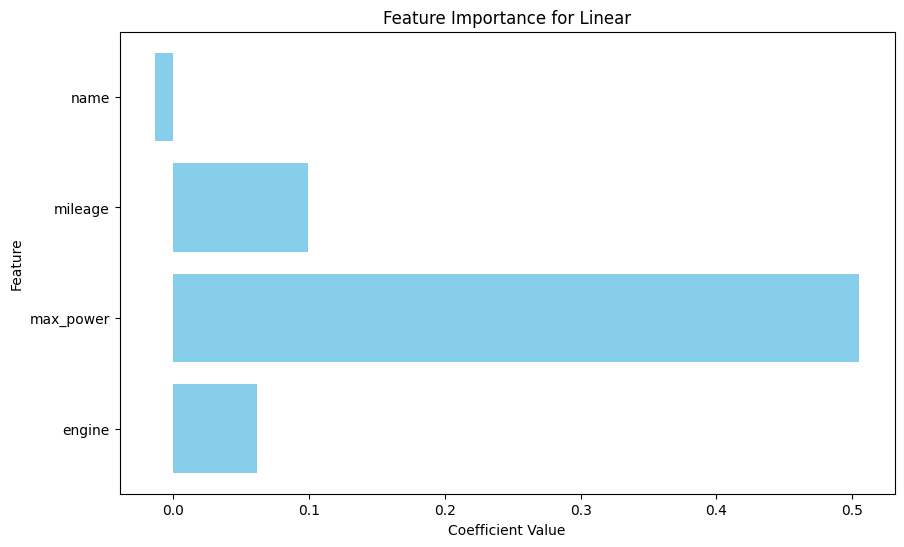

In [52]:
import pickle

regs = ['Linear'] #Polynomial
momentum = ['no']
method = ["stochastic"]
xavier = ["zero"]
learning_rate = [0.01]
isPolynomial = [True]


for reg in regs:
    for lr in learning_rate:
        for poly in isPolynomial:
            for met in method:
                for mom in momentum:
                    for xv in xavier:
                        params = {"method": met, "lr": lr, "l": 0.1, "initialization": xv, "step": mom, "polynomial": isPolynomial}
                        print("="*5, reg, "="*5)
                            
                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_test)
                        mse  = model.mse(yhat, y_test)
                        #Added
                        r2_score = model.r2_score(yhat, y_test)

                        print("Test MSE: ", mse)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        # #######
                        #Plot Feature Importances
                        coefficients = model.get_coefficients()
                        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'{X.columns[i]}' for i in range(X_train.shape[1] -1)]
                        print (f"COEF: {coefficients}, {feature_names}")
                        
                        model.plot_feature_importance(reg, feature_names, coefficients)
                        

# Save the model as a pickle file
filename = 'trained_model_v2.1.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
# filename = 'trained_model_v2.sav'
# pickle.dump(grid, open(filename, 'wb'))

print(f"Model saved as {filename}")
                       
        

In [53]:
signature

inputs: 
  [Tensor('float64', (-1, 5))]
outputs: 
  [Tensor('float64', (-1,))]
params: 
  None

In [54]:
#step 2: load your model
loaded_model = pickle.load(open(filename, 'rb'))
type(loaded_model)
#step 3: predict your model
# sample = df[['engine', 'max_power', 'mileage', 'name']].loc[42]
# sample

__main__.Linear

In [60]:
sample_np = np.array([[1, 1000000.0, 78.00, 23.00, 28.0]])
answer = loaded_model.predict(sample_np)
answer = answer

answer

array([61427.49502276])